In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlalchemy

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from database_credentials import get_database_url
from load_transform import load_transform_combine, pivot

In [2]:
sns.set_style('white')

In [3]:
database_url = get_database_url()
engine = sqlalchemy.create_engine(database_url)
connection = engine.connect()

In [9]:
num_weeks = 7
sell_data = load_transform_combine(num_weeks, connection)

trends = pivot(sell_data)
trends = stats.zscore(trends)

predictions = pd.read_csv('data/predictions.csv')

In [14]:
pca = PCA(n_components=2)
pca_trend_components = pca.fit_transform(trends)

tsne = TSNE(n_components=2)
tsne_trend_components = tsne.fit_transform(trends)

In [6]:
cmap = sns.choose_colorbrewer_palette(data_type='q')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

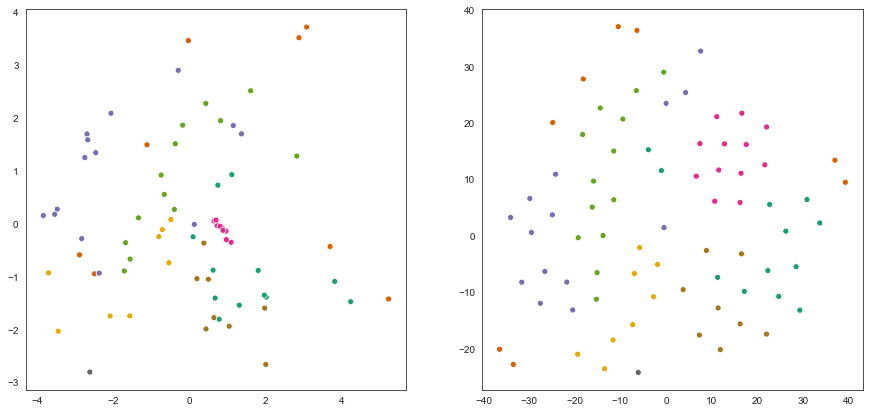

In [18]:
figure, axes = plt.subplots(ncols=2, figsize=(15, 7))

pca_component_plot = sns.scatterplot(
    x=pca_trend_components[:, 0], 
    y=pca_trend_components[:, 1], 
    hue=predictions['hierarchical'],
    ax=axes[0],
    legend=None,
    palette=cmap
)

tsne_component_plot = sns.scatterplot(
        x=tsne_trend_components[:, 0], 
        y=tsne_trend_components[:, 1], 
        hue=predictions['hierarchical'],
        ax=axes[1],
        legend=None,
        palette=cmap
)

plt.show()